## This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Read the data

In [2]:
main_df = pd.read_csv('Data-Collisions.csv')

## Get a look into Data Types

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

## Find sum of null values

In [4]:
main_df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Select Feature

In [6]:
df = main_df[['SEVERITYCODE', 'JUNCTIONTYPE','PEDCOUNT','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','WEATHER','ADDRTYPE']]
df.head()

,SEVERITYCODE,JUNCTIONTYPE,PEDCOUNT,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,WEATHER,ADDRTYPE
0,2,At Intersection (intersection related),0,Wet,Daylight,NaN,NaN,N,Overcast,Intersection
1,1,Mid-Block (not related to intersection),0,Wet,Dark - Street Lights On,NaN,NaN,0,Raining,Block
2,1,Mid-Block (not related to intersection),0,Dry,Daylight,NaN,NaN,0,Overcast,Block
3,1,Mid-Block (not related to intersection),0,Dry,Daylight,NaN,NaN,N,Clear,Block
4,2,At Intersection (intersection related),0,Wet,Daylight,NaN,NaN,0,Raining,Intersection


## Data Cleaning and Transformation

### Replace Null Values of Selected Feature

In [7]:
df['UNDERINFL']=df['UNDERINFL'].fillna('0')
df['SPEEDING']=df['SPEEDING'].fillna('0')
df['ADDRTYPE']=df['ADDRTYPE'].fillna('Unknown')
df['WEATHER']=df['WEATHER'].fillna('Unknown')
df['ROADCOND']=df['ROADCOND'].fillna('Unknown')
df['LIGHTCOND']=df['LIGHTCOND'].fillna('Unknown')
df['JUNCTIONTYPE']=df['LIGHTCOND'].fillna('Unknown')
df['INATTENTIONIND']=df['INATTENTIONIND'].fillna('0')

### Replace Values for supposedly numerical categories

In [8]:
df['UNDERINFL'].replace({'0': 0, '1':1, 'Y':1, 'N':0}, inplace=True)
df['INATTENTIONIND'].replace({'0': 0,'Y':1}, inplace=True)
df['SPEEDING'].replace({'0': 0,'Y':1}, inplace=True)

### Label encode the categorical columns

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['JUNCTIONTYPE']=label_encoder.fit_transform(df['JUNCTIONTYPE'])
df['WEATHER']=label_encoder.fit_transform(df['WEATHER'])
df['ADDRTYPE']=label_encoder.fit_transform(df['ADDRTYPE'])
df['LIGHTCOND']=label_encoder.fit_transform(df['LIGHTCOND'])
df['ROADCOND']=label_encoder.fit_transform(df['ROADCOND'])

In [12]:
df.head()

,SEVERITYCODE,JUNCTIONTYPE,PEDCOUNT,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,WEATHER,ADDRTYPE
0,2,5,0,8,5,0,0,0,4,2
1,1,2,0,8,2,0,0,0,6,1
2,1,5,0,0,5,0,0,0,4,1
3,1,5,0,0,5,0,0,0,1,1
4,2,5,0,8,5,0,0,0,6,2


## Resample the Dataset so it is balance

In [13]:
target=df['SEVERITYCODE']
target.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [14]:
from sklearn.utils import resample
df_severity1=df[df.SEVERITYCODE==1]
df_severity2=df[df.SEVERITYCODE==2]
df_severity1_sample = resample(df_severity1,
                         replace=False,
                         n_samples=58188,
                         random_state=123)
df_balanced=pd.concat([df_severity1_sample,df_severity2])
df_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

## Look for those with high correlation

In [15]:
correlated_features = set()
correlation_matrix = df_balanced.drop('SEVERITYCODE', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [16]:
correlated_features

{'LIGHTCOND'}

Text(159.0, 0.5, 'Vehicle, person and pedestrial counts')

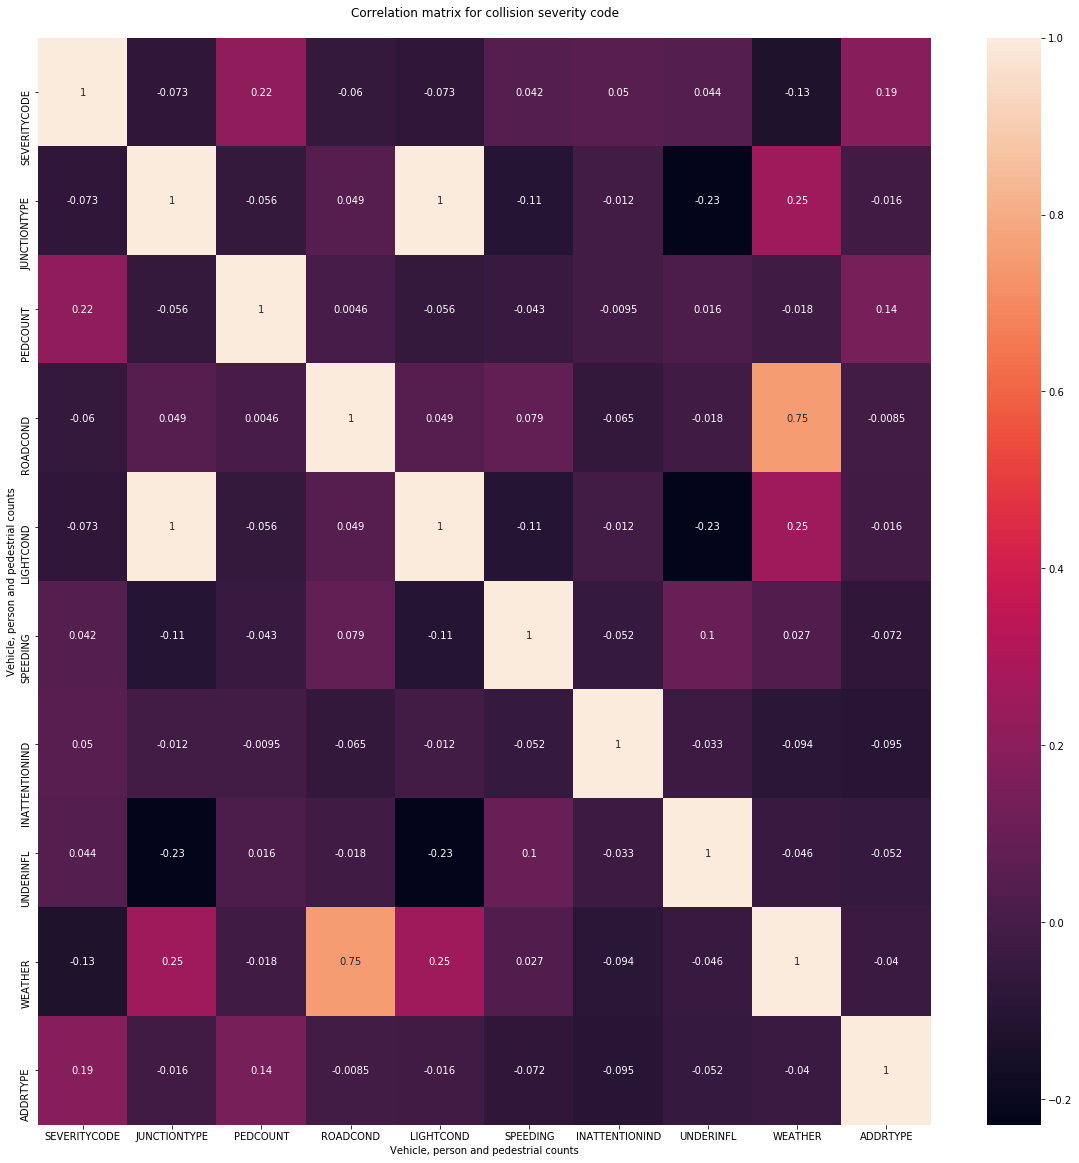

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

correlation = df_balanced.corr()
fig, ax = plt.subplots(figsize=(20,20))      
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,ax=ax)
plt.title('Correlation matrix for collision severity code\n')
plt.xlabel('Vehicle, person and pedestrial counts')
plt.ylabel('Vehicle, person and pedestrial counts')

## Perform RFECV as Exploratory Analysis

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X = df_balanced.drop('SEVERITYCODE', axis=1)
target = df_balanced['SEVERITYCODE']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [19]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 9


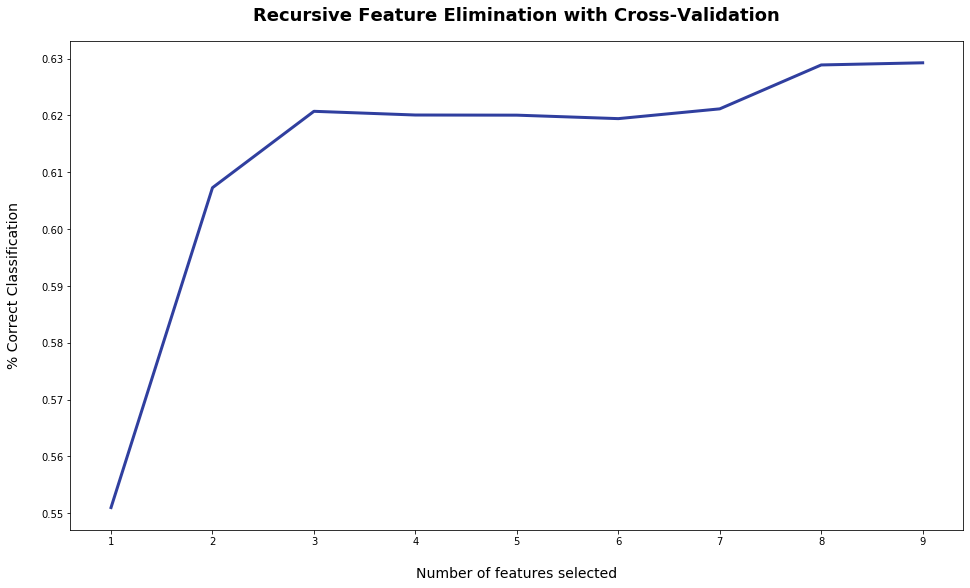

In [20]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [21]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[]


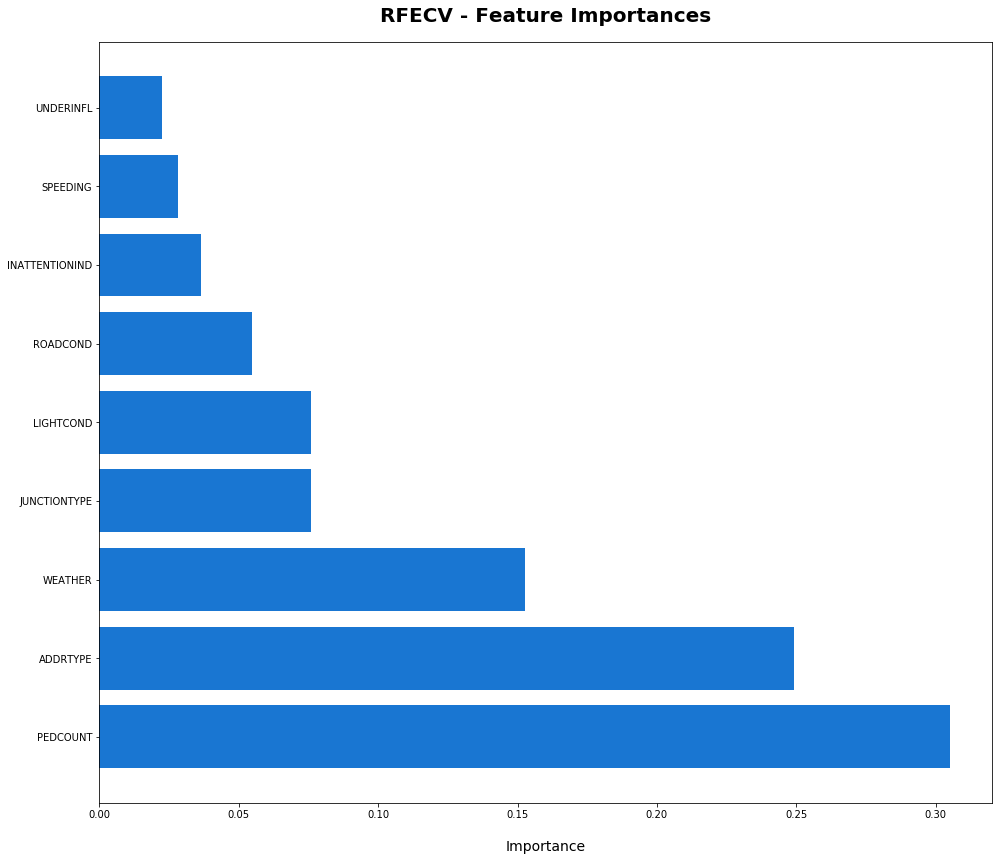

In [22]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## Get a Deeper Look Into Contributing Factor

### Address Type

In [23]:
addr=main_df[['ADDRTYPE','SEVERITYCODE']] 
by_addr=pd.DataFrame(addr.groupby(['ADDRTYPE','SEVERITYCODE'],as_index=False).agg(np.size))
by_addr.reset_index(inplace=True)
by_addr.columns=['ADDRTYPE','SEVERITYCODE','ADDRCOUNT']
by_addr.sort_values(by=['ADDRCOUNT'],inplace=True,ascending=False)
by_addr

,ADDRTYPE,SEVERITYCODE,ADDRCOUNT
2,Block,1,193660
4,Intersection,1,74502
3,Block,2,60192
5,Intersection,2,55638
0,Alley,1,1338
1,Alley,2,164


Text(0, 0.5, 'Number of accidents by Severity')

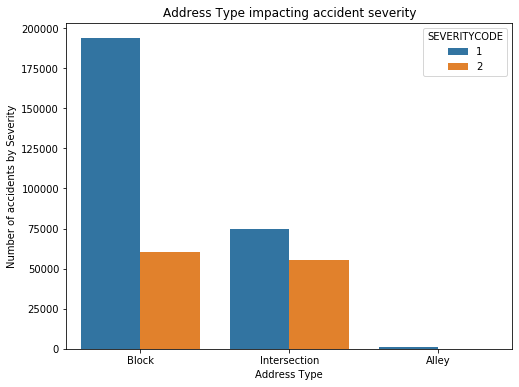

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(y='ADDRCOUNT',x='ADDRTYPE',hue='SEVERITYCODE',data=by_addr)
plt.title('Address Type impacting accident severity')
plt.xlabel('Address Type')
plt.ylabel('Number of accidents by Severity')

### Light Condition

In [52]:
light=main_df[['LIGHTCOND','SEVERITYCODE']] 
by_light=pd.DataFrame(light.groupby(['LIGHTCOND','SEVERITYCODE'],as_index=False).agg(np.size))
by_light.reset_index(inplace=True)
by_light.columns=['LIGHTCOND','SEVERITYCODE','LIGHTCOUNT']
by_light.sort_values(by=['LIGHTCOUNT'],inplace=True,ascending=False)
by_light

,LIGHTCOND,SEVERITYCODE,LIGHTCOUNT
10,Daylight,1,155186
11,Daylight,2,77088
4,Dark - Street Lights On,1,68064
5,Dark - Street Lights On,2,28950
16,Unknown,1,25736
12,Dusk,1,7916
13,Dusk,2,3888
8,Dawn,1,3356
0,Dark - No Street Lights,1,2406
2,Dark - Street Lights Off,1,1766


Text(0, 0.5, 'Number of accidents by Severity')

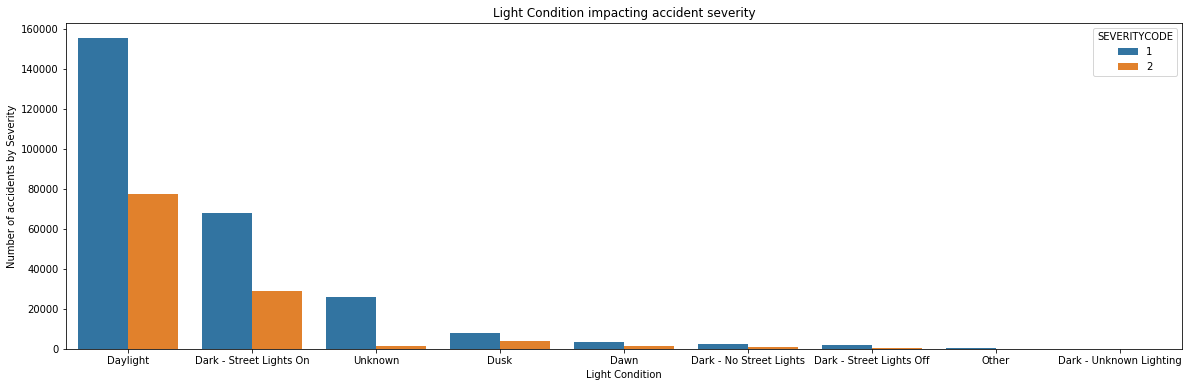

In [54]:
plt.figure(figsize=(20,6))
sns.barplot(y='LIGHTCOUNT',x='LIGHTCOND',hue='SEVERITYCODE',data=by_light)
plt.title('Light Condition impacting accident severity')
plt.xlabel('Light Condition')
plt.ylabel('Number of accidents by Severity')

### Under Influence

In [25]:
under=df[['UNDERINFL','SEVERITYCODE']] 
by_under=pd.DataFrame(under.groupby(['UNDERINFL','SEVERITYCODE'],as_index=False).agg(np.size))
by_under.reset_index(inplace=True)
by_under.columns=['UNDERINFL','SEVERITYCODE','INFLCOUNT']
by_under.sort_values(by=['INFLCOUNT'],inplace=True,ascending=False)
by_under

,UNDERINFL,SEVERITYCODE,INFLCOUNT
0,0,1,261852
1,0,2,109252
2,1,1,11118
3,1,2,7124


Text(0, 0.5, 'Number of accidents by Severity')

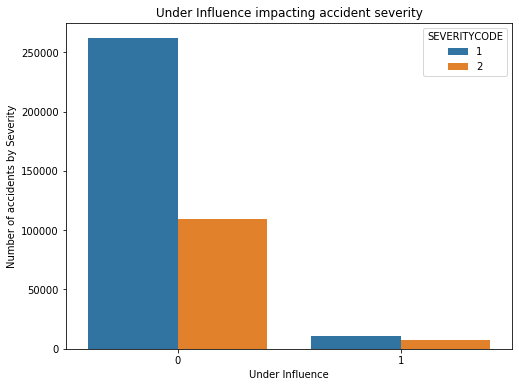

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(y='INFLCOUNT',x='UNDERINFL',hue='SEVERITYCODE',data=by_under)
plt.title('Under Influence impacting accident severity')
plt.xlabel('Under Influence')
plt.ylabel('Number of accidents by Severity')

### Pedestrian Count

In [27]:
ped=main_df[['PEDCOUNT','SEVERITYCODE']] 
by_ped=pd.DataFrame(ped.groupby(['PEDCOUNT','SEVERITYCODE'],as_index=False).agg(np.size))
by_ped.reset_index(inplace=True)
by_ped.columns=['PEDCOUNT','SEVERITYCODE','PEDSUM']
by_ped.sort_values(by=['PEDSUM'],inplace=True,ascending=False)
by_ped

,PEDCOUNT,SEVERITYCODE,PEDSUM
0,0,1,271574
1,0,2,103894
3,1,2,12014
2,1,1,1356
5,2,2,414
7,3,2,42
4,2,1,38
8,4,2,8
6,3,1,2
9,5,2,2


Text(0, 0.5, 'Number of accidents by Severity')

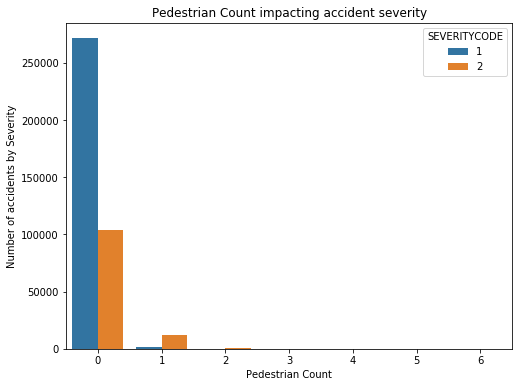

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(y='PEDSUM',x='PEDCOUNT',hue='SEVERITYCODE',data=by_ped)
plt.title('Pedestrian Count impacting accident severity')
plt.xlabel('Pedestrian Count')
plt.ylabel('Number of accidents by Severity')

## Standardize our Data

In [29]:
from sklearn.preprocessing import StandardScaler
y = df['SEVERITYCODE']
X = df.drop(['SEVERITYCODE'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Perform Different Model Selection

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=10,random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

gb_clf_performance = []
for train_index, test_index in skfold.split(X,y):
    clone_clf = clone(gb_clf)
    X_train_folds = X[train_index]
    y_train_folds = (y.iloc[train_index])
    X_test_folds = X[test_index]
    y_test_folds = (y.iloc[test_index])
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    pct_correct = n_correct/len(y_pred)
    gb_clf_performance.append(pct_correct)
    print('Result for Gradient Boosting Classifier: ', pct_correct)

Result for Gradient Boosting Classifier:  0.725395520854736
Result for Gradient Boosting Classifier:  0.7247791247174851
Result for Gradient Boosting Classifier:  0.7298130265050339
Result for Gradient Boosting Classifier:  0.7302614681255458
Result for Gradient Boosting Classifier:  0.7349360456156573
Result for Gradient Boosting Classifier:  0.7291313504905738
Result for Gradient Boosting Classifier:  0.7281553398058253
Result for Gradient Boosting Classifier:  0.7281039708224174
Result for Gradient Boosting Classifier:  0.7340114039143165
Result for Gradient Boosting Classifier:  0.7313915857605178


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

rf_clf_performance = []
for train_index, test_index in skfold.split(X,y):
    clone_clf = clone(rf_clf)
    X_train_folds = X[train_index]
    y_train_folds = (y.iloc[train_index])
    X_test_folds = X[test_index]
    y_test_folds = (y.iloc[test_index])
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    pct_correct = n_correct/len(y_pred)
    rf_clf_performance.append(pct_correct)
    print('Result for RandomForestClassifier: ', pct_correct)

Result for RandomForestClassifier:  0.7238545305116088
Result for RandomForestClassifier:  0.7240086295459215
Result for RandomForestClassifier:  0.728117937127594
Result for RandomForestClassifier:  0.7285662916730878
Result for RandomForestClassifier:  0.7328299172959367
Result for RandomForestClassifier:  0.7284121847228643
Result for RandomForestClassifier:  0.7261519494529203
Result for RandomForestClassifier:  0.7266142703035907
Result for RandomForestClassifier:  0.7323675964452664
Result for RandomForestClassifier:  0.7298505162582832


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

knn_clf_performance = []
for train_index, test_index in skfold.split(X,y):
    clone_clf = clone(knn_clf)
    X_train_folds = X[train_index]
    y_train_folds = (y.iloc[train_index])
    X_test_folds = X[test_index]
    y_test_folds = (y.iloc[test_index])
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    pct_correct = n_correct/len(y_pred)
    knn_clf_performance.append(pct_correct)
    print('Result for KNeighborsClassifier: ',pct_correct)

Result for KNeighborsClassifier:  0.70294842818985
Result for KNeighborsClassifier:  0.686048900760222
Result for KNeighborsClassifier:  0.6955003081980686
Result for KNeighborsClassifier:  0.6981044845122515
Result for KNeighborsClassifier:  0.7181383880413007
Result for KNeighborsClassifier:  0.6004520470539888
Result for KNeighborsClassifier:  0.614527148507731
Result for KNeighborsClassifier:  0.639132891560076
Result for KNeighborsClassifier:  0.5942877690450507
Result for KNeighborsClassifier:  0.7040119176041506


In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

dcsntree_clf_performance = []
for train_index, test_index in skfold.split(X,y):
    clone_clf = clone(dt_clf)
    X_train_folds = X[train_index]
    y_train_folds = (y.iloc[train_index])
    X_test_folds = X[test_index]
    y_test_folds = (y.iloc[test_index])
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    pct_correct = n_correct/len(y_pred)
    dcsntree_clf_performance.append(pct_correct)
    print('Result for DecisionTreeClassifier: ', pct_correct)

Result for DecisionTreeClassifier:  0.7235976987877543
Result for DecisionTreeClassifier:  0.7241113622354634
Result for DecisionTreeClassifier:  0.7279638380932812
Result for DecisionTreeClassifier:  0.7285662916730878
Result for DecisionTreeClassifier:  0.732470334412082
Result for DecisionTreeClassifier:  0.7281553398058253
Result for DecisionTreeClassifier:  0.7268711152206297
Result for DecisionTreeClassifier:  0.7264601633533673
Result for DecisionTreeClassifier:  0.7317511686443725
Result for DecisionTreeClassifier:  0.7282067087892331


In [34]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42)

log_clf_performance = []
for train_index, test_index in skfold.split(X,y):
    clone_clf = clone(lr_clf)
    X_train_folds = X[train_index]
    y_train_folds = (y.iloc[train_index])
    X_test_folds = X[test_index]
    y_test_folds = (y.iloc[test_index])
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    pct_correct = n_correct/len(y_pred)
    log_clf_performance.append(pct_correct)
    print('Result for LogisticRegression: ', n_correct/len(y_pred))

Result for LogisticRegression:  0.7228272036161907
Result for LogisticRegression:  0.7232381343743579
Result for LogisticRegression:  0.7267824121635504
Result for LogisticRegression:  0.7266656392869985
Result for LogisticRegression:  0.730775157959624
Result for LogisticRegression:  0.7261005804695125
Result for LogisticRegression:  0.7249704628345405
Result for LogisticRegression:  0.7243540350336467
Result for LogisticRegression:  0.7300046232085067
Result for LogisticRegression:  0.729336826424205


In [35]:
from statistics import mean
mean(gb_clf_performance), mean(rf_clf_performance), mean(knn_clf_performance), mean(dcsntree_clf_performance), mean(log_clf_performance)

(0.7295978836612109,
 0.7280773823337073,
 0.665315228347269,
 0.7278154021015096,
 0.7265055075371133)

In [42]:
dataframe = {'Model': ['GradientBooster','RandomForest','KNN','DecisionTree','Logistic'],
        'Performance': [mean(gb_clf_performance),mean(rf_clf_performance),mean(knn_clf_performance),mean(dcsntree_clf_performance), mean(log_clf_performance)]
        }
performance = pd.DataFrame(dataframe)
performance

,Model,Performance
0,GradientBooster,0.729598
1,RandomForest,0.728077
2,KNN,0.665315
3,DecisionTree,0.727815
4,Logistic,0.726506


## Test how much our model is better than random one

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

class NoChurn(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.ones((len(X),1),dtype=bool)

NoChurn = NoChurn()
cross_val_score(NoChurn,X,y,cv=10,scoring='accuracy')

array([0.69745223, 0.70988288, 0.71989932, 0.72009041, 0.7058612 ,
       0.69723121, 0.69651205, 0.70462835, 0.68192325, 0.67750552])

## Model Evaluation

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


precisions = []
recalls = []
F1s = []
models=[gb_clf, rf_clf, dt_clf, lr_clf]
for model in models:
    y_pred = cross_val_predict(model, X, y, cv=10)
    confused = confusion_matrix(y,y_pred)
    precision = precision_score(y,y_pred)
    recall = recall_score(y,y_pred)
    f1 = f1_score(y,y_pred)
    precisions.append(precision)
    recalls.append(recall)
    F1s.append(f1)
    

In [51]:
dataframe = {'Model': ['GradientBooster','RandomForest','DecisionTree','Logistic'],
            'Precision': precisions,
            'Recall': recalls,
            'F1':F1s}
confusion = pd.DataFrame(dataframe)
confusion

,Model,Precision,Recall,F1
0,GradientBooster,0.723819,0.993333,0.837425
1,RandomForest,0.724735,0.987039,0.835790
2,DecisionTree,0.724447,0.987310,0.835696
3,Logistic,0.724381,0.984496,0.834642
